___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In [214]:
# If you are using Anaconda, you can create a new environment with use of Anaconda terminal and codes below:
# conda create --name soldier
# conda install -c conda-forge ipykernel scikit-learn "numpy<1.25" pandas shap matplotlib "seaborn==0.12.2" xgboost scikit-plot imbalanced-learn numba jinja2 ipywidgets

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way.

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models

#### 4. SMOTE
- Apply Imbalance Learning Techniques

#### 5. SHAP
- Apply Feature selection with SHAP


# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [215]:
#pip install pandas

In [216]:
#pip install matplotlib

In [217]:
#pip install numpy

In [218]:
#pip install seaborn

In [219]:
#pip install scikit-learn

In [220]:
#pip install xgboost lightgbm catboost

In [221]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



import warnings
warnings.filterwarnings('ignore')
pip install --upgrade numpy scipy


SyntaxError: invalid syntax (2005460373.py, line 21)

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
import xgboost as xgb
import lightgbm as lgb
import catboost as cb


## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [ ]:
df_female = pd.read_csv("ANSUR II FEMALE Public.csv", encoding="latin-1")
df_male = pd.read_csv("ANSUR II MALE Public.csv", encoding="latin-1")

In [ ]:
df_female.head()

In [ ]:
df_male.head()

In [ ]:
df_female.info(verbose=True)

In [ ]:
df_male.info(verbose=True)

In [ ]:
df_female.shape

In [ ]:
df_male.shape

In [ ]:
df_female.columns = df_female.columns.str.lower()
df_male.columns = df_male.columns.str.lower()

In [ ]:
df = pd.concat([df_female, df_male])
df.head()

In [ ]:
df.shape

## Explore Data

In [222]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 6068 entries, 0 to 4081
Data columns (total 108 columns):
 #    Column                          Dtype 
---   ------                          ----- 
 0    subjectid                       int64 
 1    abdominalextensiondepthsitting  int64 
 2    acromialheight                  int64 
 3    acromionradialelength           int64 
 4    anklecircumference              int64 
 5    axillaheight                    int64 
 6    balloffootcircumference         int64 
 7    balloffootlength                int64 
 8    biacromialbreadth               int64 
 9    bicepscircumferenceflexed       int64 
 10   bicristalbreadth                int64 
 11   bideltoidbreadth                int64 
 12   bimalleolarbreadth              int64 
 13   bitragionchinarc                int64 
 14   bitragionsubmandibulararc       int64 
 15   bizygomaticbreadth              int64 
 16   buttockcircumference            int64 
 17   buttockdepth                    int6

In [223]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
subjectid,6068.0,20757.198418,13159.390894,10027.0,14841.75,20063.5,27234.50,920103.0
abdominalextensiondepthsitting,6068.0,246.468688,37.400106,155.0,219.00,242.0,271.00,451.0
acromialheight,6068.0,1406.161338,79.091048,1115.0,1350.00,1410.0,1462.00,1683.0
acromionradialelength,6068.0,327.374423,20.720018,249.0,313.00,328.0,341.25,393.0
anklecircumference,6068.0,224.891397,16.051833,156.0,214.00,225.0,235.00,293.0
...,...,...,...,...,...,...,...,...
subjectnumericrace,6068.0,17.515326,550.949948,1.0,1.00,1.0,2.00,42351.0
dodrace,6068.0,1.615030,0.979156,1.0,1.00,1.0,2.00,8.0
age,6068.0,29.761206,8.674650,17.0,23.00,28.0,36.00,58.0
heightin,6068.0,68.257251,3.861954,56.0,66.00,68.0,71.00,94.0


In [224]:
df.duplicated().sum()

np.int64(0)

In [225]:
df.isnull().sum()

subjectid                         0
abdominalextensiondepthsitting    0
acromialheight                    0
acromionradialelength             0
anklecircumference                0
                                 ..
dodrace                           0
age                               0
heightin                          0
weightlbs                         0
writingpreference                 0
Length: 108, dtype: int64

In [226]:
df.ethnicity

0                              NaN
1                          Mexican
2                              NaN
3               Caribbean Islander
4                              NaN
                   ...            
4077    Blackfoot Cherokee Choctaw
4078                           NaN
4079                           NaN
4080                           NaN
4081                           NaN
Name: ethnicity, Length: 6068, dtype: object

In [227]:
df.ethnicity.isnull()

0        True
1       False
2        True
3       False
4        True
        ...  
4077    False
4078     True
4079     True
4080     True
4081     True
Name: ethnicity, Length: 6068, dtype: bool

In [228]:
df.drop("ethnicity", axis=1, inplace=True)

In [229]:
df.dodrace

0       2
1       3
2       1
3       2
4       1
       ..
4077    1
4078    1
4079    1
4080    1
4081    1
Name: dodrace, Length: 6068, dtype: int64

In [230]:
df.date

0       5-Oct-10
1       5-Oct-10
2       5-Oct-10
3       5-Oct-10
4       5-Oct-10
          ...   
4077    4-Apr-12
4078    4-Apr-12
4079    4-Apr-12
4080    4-Apr-12
4081    4-Apr-12
Name: date, Length: 6068, dtype: object

In [231]:
df.installation

0         Fort Hood
1         Fort Hood
2         Fort Hood
3         Fort Hood
4         Fort Hood
           ...     
4077    Camp Shelby
4078    Camp Shelby
4079    Camp Shelby
4080    Camp Shelby
4081    Camp Shelby
Name: installation, Length: 6068, dtype: object

In [232]:
df.component

0              Regular Army
1              Regular Army
2              Regular Army
3              Regular Army
4              Regular Army
               ...         
4077    Army National Guard
4078    Army National Guard
4079    Army National Guard
4080    Army National Guard
4081    Army National Guard
Name: component, Length: 6068, dtype: object

In [233]:
df.branch

0               Combat Support
1       Combat Service Support
2       Combat Service Support
3       Combat Service Support
4                  Combat Arms
                 ...          
4077               Combat Arms
4078               Combat Arms
4079               Combat Arms
4080               Combat Arms
4081               Combat Arms
Name: branch, Length: 6068, dtype: object

In [234]:
df.primarymos

0       92Y
1       25U
2       35D
3       25U
4       42A
       ... 
4077    11B
4078    91B
4079    13B
4080    13P
4081    92Y
Name: primarymos, Length: 6068, dtype: object

In [235]:
df.drop(columns=["primarymos","component","branch","installation","date"],inplace=True)

In [236]:
df.subjectid 

0       10037
1       10038
2       10042
3       10043
4       10051
        ...  
4077    29442
4078    29443
4079    29447
4080    29451
4081    29452
Name: subjectid, Length: 6068, dtype: int64

In [237]:
df.subjectnumericrace.value_counts()

subjectnumericrace
1        3561
2        1026
3         541
31        160
51        126
8         116
4         109
21         60
6          59
41         46
61         35
23         34
28         26
251        20
18         18
5          18
25         14
351        10
38          9
35          8
64          8
62          8
42          7
63          7
231         6
43          5
235         4
218         3
451         2
651         2
641         2
423         2
2351        2
2518        2
318         2
431         2
428         1
631         1
48          1
42351       1
425         1
358         1
238         1
4251        1
Name: count, dtype: int64

In [238]:
df.drop(columns=["subjectid","subjectnumericrace"],inplace=True)

In [239]:
df.dodrace.value_counts()

dodrace
1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: count, dtype: int64

In [240]:
df = df[(df.dodrace==1) | (df.dodrace==2) | (df.dodrace==3)]
df.dodrace.value_counts()

dodrace
1    3792
2    1298
3     679
Name: count, dtype: int64

In [241]:
df.stature

0       1560
1       1665
2       1711
3       1660
4       1572
        ... 
4077    1688
4078    1765
4079    1690
4080    1718
4081    1828
Name: stature, Length: 5769, dtype: int64

In [242]:
df.weightkg

0       657
1       534
2       663
3       782
4       886
       ... 
4077    675
4078    896
4079    832
4080    731
4081    985
Name: weightkg, Length: 5769, dtype: int64

In [243]:
df.heightin

0       61
1       64
2       68
3       66
4       63
        ..
4077    67
4078    71
4079    67
4080    69
4081    73
Name: heightin, Length: 5769, dtype: int64

In [244]:
df.weightlbs

0       142
1       120
2       147
3       175
4       195
       ... 
4077    160
4078    194
4079    186
4080    165
4081    218
Name: weightlbs, Length: 5769, dtype: int64

In [245]:
df.drop(columns=["weightlbs", "heightin"],inplace=True)

In [246]:
df.shape

(5769, 98)

In [247]:
df.reset_index(drop=True, inplace=True)

In [248]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
abdominalextensiondepthsitting,5769.0,247.254290,37.457748,155.0,220.0,243.0,272.0,451.0
acromialheight,5769.0,1408.630265,78.303123,1146.0,1353.0,1412.0,1464.0,1683.0
acromionradialelength,5769.0,328.071590,20.444554,249.0,314.0,328.0,342.0,393.0
anklecircumference,5769.0,225.201768,15.965783,156.0,214.0,225.0,235.0,293.0
axillaheight,5769.0,1301.902583,71.260913,1062.0,1252.0,1304.0,1351.0,1553.0
...,...,...,...,...,...,...,...,...
weightkg,5769.0,800.981106,155.990338,358.0,686.0,790.0,900.0,1442.0
wristcircumference,5769.0,169.308372,13.060900,124.0,159.0,171.0,179.0,216.0
wristheight,5769.0,831.334547,47.321580,688.0,798.0,831.0,864.0,1009.0
dodrace,5769.0,1.460392,0.695637,1.0,1.0,1.0,2.0,3.0


In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5769 entries, 0 to 5768
Data columns (total 98 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   abdominalextensiondepthsitting  5769 non-null   int64 
 1   acromialheight                  5769 non-null   int64 
 2   acromionradialelength           5769 non-null   int64 
 3   anklecircumference              5769 non-null   int64 
 4   axillaheight                    5769 non-null   int64 
 5   balloffootcircumference         5769 non-null   int64 
 6   balloffootlength                5769 non-null   int64 
 7   biacromialbreadth               5769 non-null   int64 
 8   bicepscircumferenceflexed       5769 non-null   int64 
 9   bicristalbreadth                5769 non-null   int64 
 10  bideltoidbreadth                5769 non-null   int64 
 11  bimalleolarbreadth              5769 non-null   int64 
 12  bitragionchinarc                5769 non-null   

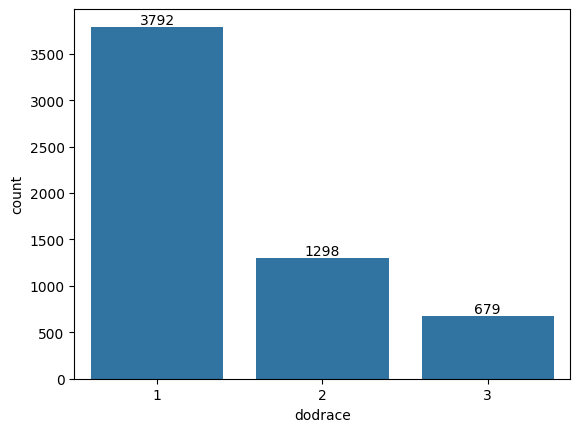

In [250]:
ax=sns.countplot(data=df, x="dodrace")   # 1 = White, 2 = Black, 3 = Hispanic
ax.bar_label(ax.containers[0]);  
plt.show()

In [251]:
df.dodrace.value_counts()  # inbalanced data, scaling must be done

dodrace
1    3792
2    1298
3     679
Name: count, dtype: int64

In [252]:
df["dodrace"] = df.dodrace.map(
    {
        1: "White",
        2: "Black",
        3: "Hispanic",
        4: "Asian",
        5: "Native American",
        6: "Pacific Islander",
        8: "Other",
    }
)

In [253]:
df_corr = df.corr(numeric_only=True)
df_corr

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,...,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,age
abdominalextensiondepthsitting,1.000000,0.351934,0.312919,0.518896,0.280824,0.456729,0.332593,0.417617,0.691126,0.505856,...,0.572029,0.858962,0.939645,0.958716,0.579494,0.147130,0.825198,0.546947,0.383157,0.385555
acromialheight,0.351934,1.000000,0.868267,0.504673,0.987115,0.693952,0.797793,0.733288,0.522740,0.401588,...,0.727869,0.438562,0.405161,0.362314,0.607020,0.930954,0.677768,0.733564,0.921268,0.082966
acromionradialelength,0.312919,0.868267,1.000000,0.416051,0.857391,0.604208,0.725966,0.667377,0.452499,0.343457,...,0.609591,0.373562,0.354902,0.327976,0.480876,0.845864,0.595740,0.642518,0.677140,0.081739
anklecircumference,0.518896,0.504673,0.416051,1.000000,0.461200,0.709550,0.561528,0.536816,0.637641,0.450363,...,0.510452,0.585273,0.564041,0.510282,0.482198,0.408262,0.741326,0.697485,0.508567,-0.026483
axillaheight,0.280824,0.987115,0.857391,0.461200,1.000000,0.657023,0.785011,0.705028,0.457740,0.361619,...,0.679879,0.362550,0.328417,0.290065,0.567598,0.946468,0.613565,0.685336,0.903063,0.044501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
waistheightomphalion,0.147130,0.930954,0.845864,0.408262,0.946468,0.618589,0.778020,0.688401,0.405072,0.253448,...,0.519106,0.232557,0.189016,0.151335,0.392186,1.000000,0.519696,0.632789,0.812746,-0.027897
weightkg,0.825198,0.677768,0.595740,0.741326,0.613565,0.730920,0.645382,0.703679,0.875365,0.580564,...,0.724779,0.858881,0.872855,0.830974,0.679795,0.519696,1.000000,0.798308,0.665846,0.233398
wristcircumference,0.546947,0.733564,0.642518,0.697485,0.685336,0.827143,0.743230,0.803051,0.760451,0.348062,...,0.723534,0.578244,0.576793,0.553025,0.617985,0.632789,0.798308,1.000000,0.663459,0.150658
wristheight,0.383157,0.921268,0.677140,0.508567,0.903063,0.629620,0.683307,0.621811,0.501066,0.460298,...,0.701594,0.479839,0.440938,0.388914,0.617996,0.812746,0.665846,0.663459,1.000000,0.110000


In [256]:
for i in df.select_dtypes("object"):
    print(f"{i:<30}:", df[i].unique())
    
# OneHotEncoder:
# OneHotEncoder converts categorical features into dummies 0 and 1.
# If we want our model to treat all unique values under the categorical feature equally,
# we convert our categorical data to 0 and 1 using the onehotencoder conversion algorithm.

# OrdinalEncoder:
# if unique categorical data under a featurea have a hierarchical advantage over
# each other (good, bad, very bad or cheap, average, expensive, very expensive) etc.
# If we want the model to treat all observations according to their superiority,
# that is, not to treat them equally, we use the ordianlencoder conversion algorithm.

# To briefly summarize, if a feature has a meaningful relationship with the target, the ordinal encoder is applied.

gender                        : ['Female' 'Male']
subjectsbirthlocation         : ['Germany' 'California' 'Texas' 'District of Columbia' 'New Mexico'
 'Virginia' 'South Korea' 'Massachusetts' 'Michigan' 'Dominican Republic'
 'Colorado' 'United States' 'South Dakota' 'Louisiana' 'Ohio'
 'South Carolina' 'Mississippi' 'Illinois' 'West Virginia' 'New York'
 'Iowa' 'Florida' 'Poland' 'Oklahoma' 'Pennsylvania' 'North Carolina'
 'Alabama' 'Wisconsin' 'Arizona' 'Washington' 'Kentucky' 'Tennessee'
 'Connecticut' 'Iceland' 'Kansas' 'Georgia' 'Oregon' 'Delaware' 'Indiana'
 'Jamaica' 'Puerto Rico' 'Mexico' 'Maryland' 'Hawaii' 'Ukraine' 'Montana'
 'Italy' 'North Dakota' 'Argentina' 'Saint Lucia' 'New Jersey' 'Dominica'
 'Peru' 'Israel' 'Utah' 'Turkey' 'Morocco' 'Nevada' 'Honduras' 'Russia'
 'United Kingdom' 'Missouri' 'Serbia' 'Belgium' 'Minnesota' 'Ecuador'
 'Canada' 'Idaho' 'Trinidad and Tobago' 'Bolivia' 'Wyoming' 'Panama'
 'Nebraska' 'Liberia' 'Kenya' 'Philippines' 'Ghana' 'Maine' 'Guyana'
 'H

In [257]:
df.select_dtypes(include=['object'])

,gender,subjectsbirthlocation,dodrace,writingpreference
0,Female,Germany,Black,Right hand
1,Female,California,Hispanic,Right hand
2,Female,Texas,White,Right hand
3,Female,District of Columbia,Black,Right hand
4,Female,Texas,White,Right hand
...,...,...,...,...
5764,Male,Colorado,White,Right hand
5765,Male,Oklahoma,White,Right hand
5766,Male,Oklahoma,White,Right hand
5767,Male,Oklahoma,White,Right hand


# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [258]:
X = df.drop(columns=["dodrace"])
y = df.dodrace

In [259]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42, stratify=y)

In [260]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (4615, 97)
Train target shape   :  (4615,)
Test features shape  :  (1154, 97)
Test target shape    :  (1154,)


# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## 1. Logistic model

### Vanilla Logistic Model

In [261]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [262]:
cat = X_train.select_dtypes("object").columns
cat

Index(['gender', 'subjectsbirthlocation', 'writingpreference'], dtype='object')

In [263]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler

column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat),remainder=MinMaxScaler(),verbose_feature_names_out=False,)

In [264]:
from sklearn.pipeline import Pipeline

operations = [
    ("OneHotEncoder", column_trans),
    ( "log",
        LogisticRegression(class_weight="balanced", max_iter=10000, random_state=101),),]

log_model = Pipeline(steps=operations)

In [265]:
log_model.fit(X_train, y_train)
eval_metric(log_model, X_train, y_train, X_test, y_test)

Test_Set
[[240  10  10]
 [ 13 102  21]
 [  8  98 652]]
              precision    recall  f1-score   support

       Black       0.92      0.92      0.92       260
    Hispanic       0.49      0.75      0.59       136
       White       0.95      0.86      0.90       758

    accuracy                           0.86      1154
   macro avg       0.79      0.84      0.81      1154
weighted avg       0.89      0.86      0.87      1154


Train_Set
[[ 976   33   29]
 [  14  464   65]
 [  69  355 2610]]
              precision    recall  f1-score   support

       Black       0.92      0.94      0.93      1038
    Hispanic       0.54      0.85      0.67       543
       White       0.97      0.86      0.91      3034

    accuracy                           0.88      4615
   macro avg       0.81      0.89      0.84      4615
weighted avg       0.91      0.88      0.89      4615



In [266]:
from sklearn.metrics import make_scorer


In [267]:
f1_Hispanic = make_scorer(f1_score, pos_label="Hispanic", average = None, labels =["Hispanic"])
precision_Hispanic = make_scorer(precision_score, pos_label="Hispanic", average = None, labels =["Hispanic"])
recall_Hispanic = make_scorer(recall_score, pos_label="Hispanic", average = None, labels =["Hispanic"])

In [268]:
scoring = {
    "precision_Hispanic": make_scorer(f1_score, pos_label="Hispanic", average = None, labels =["Hispanic"]),
    "recall_Hispanic": make_scorer(precision_score, pos_label="Hispanic", average = None, labels =["Hispanic"]),
    "f1_Hispanic": make_scorer(recall_score, pos_label="Hispanic", average = None, labels =["Hispanic"]),
}

In [269]:
from sklearn.model_selection import cross_validate


In [270]:
operations = [
    ("OneHotEncoder", column_trans),
    ( "log",
        LogisticRegression(class_weight="balanced", max_iter=10000, random_state=101),
    ),
]

model = Pipeline(steps=operations)

scores = cross_validate(
    model, X_train, y_train, scoring=scoring, cv=10, n_jobs=-1, return_train_score=True
)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_precision_Hispanic     0.619692
train_precision_Hispanic    0.661679
test_recall_Hispanic        0.512087
train_recall_Hispanic       0.540620
test_f1_Hispanic            0.787879
train_f1_Hispanic           0.852668
dtype: float64

### Logistic Model GridsearchCV

In [271]:
recall_Hispanic =make_scorer(recall_score, pos_label="Hispanic", average = None, labels =["Hispanic"])

In [272]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris


In [273]:
param_grid = {
    "log__C": [0.5, 1],
    "log__penalty": ["l1", "l2"],
    "log__solver": ["liblinear", "lbfgs"],
}

In [274]:
operations = [
    ("OneHotEncoder", column_trans),
    (  "log",
        LogisticRegression(class_weight="balanced", max_iter=10000, random_state=101),
    ),
]

model = Pipeline(steps=operations)


log_model_grid = GridSearchCV(
    model,
    param_grid,
    scoring=recall_Hispanic,
    cv=10,
    n_jobs=-1,
    return_train_score=True,
)

In [275]:
log_model_grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         Index(['gender', 'subjectsbirthlocation', 'writingpreference'], dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('log',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=10000,
                                                           random_state=101))]),
             n_jobs=-1,
             param_grid={'log__C': [0.5, 1], 'log__penalty': ['l1', 'l2'],
                         'log__solver': ['liblinear', 'lbfgs']},
             return_train_score=True,
             scoring=make_scorer(recall_score, response_method='predict', pos_label=Hispanic, average=None, labels=['Hispanic']))

In [276]:
log_model_grid.best_estimator_

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['gender', 'subjectsbirthlocation', 'writingpreference'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('log',
                 LogisticRegression(C=1, class_weight='balanced',
                                    max_iter=10000, random_state=101))])

In [277]:
pd.DataFrame(log_model_grid.cv_results_).loc[
    log_model_grid.best_index_, ["mean_test_score", "mean_train_score"]
]

mean_test_score     0.787879
mean_train_score    0.852668
Name: 7, dtype: object

In [278]:
eval_metric(log_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[240  10  10]
 [ 13 102  21]
 [  8  98 652]]
              precision    recall  f1-score   support

       Black       0.92      0.92      0.92       260
    Hispanic       0.49      0.75      0.59       136
       White       0.95      0.86      0.90       758

    accuracy                           0.86      1154
   macro avg       0.79      0.84      0.81      1154
weighted avg       0.89      0.86      0.87      1154


Train_Set
[[ 976   33   29]
 [  14  464   65]
 [  69  355 2610]]
              precision    recall  f1-score   support

       Black       0.92      0.94      0.93      1038
    Hispanic       0.54      0.85      0.67       543
       White       0.97      0.86      0.91      3034

    accuracy                           0.88      4615
   macro avg       0.81      0.89      0.84      4615
weighted avg       0.91      0.88      0.89      4615



## 2. SVC

### Vanilla SVC model

In [279]:
operations_svc = [
    ("OneHotEncoder", column_trans),
    ("svc", SVC(class_weight="balanced", random_state=101)),
]

svc_model = Pipeline(steps=operations_svc)

In [281]:
svc_model.fit(X_train, y_train)

eval_metric(svc_model, X_train, y_train, X_test, y_test)

Test_Set
[[240  12   8]
 [ 12 102  22]
 [ 15 111 632]]
              precision    recall  f1-score   support

       Black       0.90      0.92      0.91       260
    Hispanic       0.45      0.75      0.57       136
       White       0.95      0.83      0.89       758

    accuracy                           0.84      1154
   macro avg       0.77      0.84      0.79      1154
weighted avg       0.88      0.84      0.86      1154


Train_Set
[[ 956   39   43]
 [  20  459   64]
 [  53  397 2584]]
              precision    recall  f1-score   support

       Black       0.93      0.92      0.93      1038
    Hispanic       0.51      0.85      0.64       543
       White       0.96      0.85      0.90      3034

    accuracy                           0.87      4615
   macro avg       0.80      0.87      0.82      4615
weighted avg       0.90      0.87      0.88      4615



In [282]:
model = Pipeline(steps=operations_svc)

scores = cross_validate(
    model, X_train, y_train, scoring=scoring, cv=10, n_jobs=-1, return_train_score=True
)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_precision_Hispanic     0.587498
train_precision_Hispanic    0.633704
test_recall_Hispanic        0.473355
train_recall_Hispanic       0.508040
test_f1_Hispanic            0.775152
train_f1_Hispanic           0.842027
dtype: float64

###  SVC Model GridsearchCV

In [283]:
param_grid = {"svc__C": [0.5, 1], "svc__gamma": ["scale", "auto", 0.01]}

In [286]:
operations_svc = [
    ("OneHotEncoder", column_trans),
    ("svc", SVC(class_weight="balanced", random_state=101)),
]

model = Pipeline(steps=operations_svc)

svc_model_grid = GridSearchCV(
    model,
    param_grid,
    scoring=recall_Hispanic,
    cv=10,
    n_jobs=-1,
    return_train_score=True,
)

In [287]:
svc_model_grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         Index(['gender', 'subjectsbirthlocation', 'writingpreference'], dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('svc',
                                        SVC(class_weight='balanced',
                                            random_state=101))]),
             n_jobs=-1,
             param_grid={'svc__C': [0.5, 1],
                         'svc__gamma': ['scale', 'auto', 0.01]},
             return_train_score=True,
             scoring=make_scorer(recall_score, response_method='predict', pos_label=Hispanic, average=None, labels=['Hispanic']))

In [288]:
svc_model_grid.best_estimator_

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['gender', 'subjectsbirthlocation', 'writingpreference'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('svc', SVC(C=1, class_weight='balanced', random_state=101))])

In [289]:
pd.DataFrame(svm_model_grid.cv_results_).loc[
    svc_model_grid.best_index_, ["mean_test_score", "mean_train_score"]
]

mean_test_score     0.775152
mean_train_score    0.842027
Name: 3, dtype: object

In [290]:
eval_metric(svc_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[240  12   8]
 [ 12 102  22]
 [ 15 111 632]]
              precision    recall  f1-score   support

       Black       0.90      0.92      0.91       260
    Hispanic       0.45      0.75      0.57       136
       White       0.95      0.83      0.89       758

    accuracy                           0.84      1154
   macro avg       0.77      0.84      0.79      1154
weighted avg       0.88      0.84      0.86      1154


Train_Set
[[ 956   39   43]
 [  20  459   64]
 [  53  397 2584]]
              precision    recall  f1-score   support

       Black       0.93      0.92      0.93      1038
    Hispanic       0.51      0.85      0.64       543
       White       0.96      0.85      0.90      3034

    accuracy                           0.87      4615
   macro avg       0.80      0.87      0.82      4615
weighted avg       0.90      0.87      0.88      4615



## 3. RF

In [291]:
from sklearn.preprocessing import OrdinalEncoder


ord_enc = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)

column_trans = make_column_transformer((ord_enc, cat), remainder="passthrough")

### Vanilla RF Model

In [292]:
operations_rf = [
    ("OrdinalEncoder", column_trans),
    ("RF_model", RandomForestClassifier(class_weight="balanced", random_state=101)),
]

rfm_model = Pipeline(steps=operations_rf)

rfm_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['gender', 'subjectsbirthlocation', 'writingpreference'], dtype='object'))])),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=101))])

In [293]:
eval_metric(rfm_model, X_train, y_train, X_test, y_test)

Test_Set
[[182   0  78]
 [  6   6 124]
 [ 11   5 742]]
              precision    recall  f1-score   support

       Black       0.91      0.70      0.79       260
    Hispanic       0.55      0.04      0.08       136
       White       0.79      0.98      0.87       758

    accuracy                           0.81      1154
   macro avg       0.75      0.57      0.58      1154
weighted avg       0.79      0.81      0.76      1154


Train_Set
[[1038    0    0]
 [   0  543    0]
 [   0    0 3034]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00      1038
    Hispanic       1.00      1.00      1.00       543
       White       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [294]:
operations_rf = [
    ("OrdinalEncoder", column_trans),
    ("RF_model", RandomForestClassifier(class_weight="balanced", random_state=101)),
]

model = Pipeline(steps=operations_rf)

scores = cross_validate(
    model, X_train, y_train, scoring=scoring, cv=5, n_jobs=-1, return_train_score=True
)
df_scores = pd.DataFrame(scores, index=range(1, 6))
df_scores.mean()[2:]

test_precision_Hispanic     0.076836
train_precision_Hispanic    1.000000
test_recall_Hispanic        0.813095
train_recall_Hispanic       1.000000
test_f1_Hispanic            0.040554
train_f1_Hispanic           1.000000
dtype: float64

### RF Model GridsearchCV

In [302]:
param_grid = {
    "RF_model__n_estimators": [400, 500],
    "RF_model__max_depth": [2, 3],
    "RF_model__min_samples_split":[18,20,22],
    "RF_model__max_features": ['auto', None, 15, 20]
}

In [303]:
operations_rf = [
    ("OrdinalEncoder", column_trans),
    ("RF_model", RandomForestClassifier(class_weight="balanced", random_state=101)),
]


In [304]:
model = Pipeline(steps=operations_rf)
rfm_grid = GridSearchCV(
    model, param_grid, scoring=recall_Hispanic, n_jobs=-1, return_train_score=True
)

In [305]:
rfm_grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['gender', 'subjectsbirthlocation', 'writingpreference'], dtype='object'))])),
                                       ('RF_model',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=101))]),
             n_jobs=-1,
             param_grid={'RF_model__max_depth': [2, 3],
                         'RF_model__max_features': ['auto', None, 15, 20],
                         'RF_model__min_samples_split': [18, 20, 22],
                         'RF_model__n_estimators': [400, 500]},
             return_train_score=True,
             scoring=make_scorer(recall_score, response_method='predict', pos_label=Hispanic, average=None, labels=['Hispanic']))

In [306]:
rfm_grid.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['gender', 'subjectsbirthlocation', 'writingpreference'], dtype='object'))])),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced', max_depth=3,
                                        max_features=15, min_samples_split=18,
                                        n_estimators=400, random_state=101))])

In [307]:
rfm_grid.best_params_

{'RF_model__max_depth': 3,
 'RF_model__max_features': 15,
 'RF_model__min_samples_split': 18,
 'RF_model__n_estimators': 400}

In [308]:
pd.DataFrame(rfm_grid.cv_results_).loc[
    rfm_grid.best_index_, ["mean_test_score", "mean_train_score"]
]

mean_test_score     0.616905
mean_train_score     0.67862
Name: 36, dtype: object

In [309]:
rfm_grid.best_score_

np.float64(0.6169045191980972)

In [310]:
eval_metric(rfm_grid, X_train, y_train, X_test, y_test)

Test_Set
[[199  36  25]
 [ 13  88  35]
 [ 74 257 427]]
              precision    recall  f1-score   support

       Black       0.70      0.77      0.73       260
    Hispanic       0.23      0.65      0.34       136
       White       0.88      0.56      0.69       758

    accuracy                           0.62      1154
   macro avg       0.60      0.66      0.59      1154
weighted avg       0.76      0.62      0.65      1154


Train_Set
[[ 801  157   80]
 [  52  359  132]
 [ 266 1057 1711]]
              precision    recall  f1-score   support

       Black       0.72      0.77      0.74      1038
    Hispanic       0.23      0.66      0.34       543
       White       0.89      0.56      0.69      3034

    accuracy                           0.62      4615
   macro avg       0.61      0.67      0.59      4615
weighted avg       0.77      0.62      0.66      4615



## 4. XGBoost

In [311]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris



### Vanilla XGBoost Model

In [312]:
operations_xgb = [
    ("OrdinalEncoder", column_trans),
    ("XGB_model", XGBClassifier(random_state=101)),
]

xgb_model = Pipeline(steps=operations_xgb)
y_train_xgb = y_train.map({"Black": 0, "Hispanic": 1, "White": 2})
y_test_xgb = y_test.map({"Black": 0, "Hispanic": 1, "White": 2})
xgb_model.fit(X_train, y_train_xgb)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['gender', 'subjectsbirthlocation', 'writingpreference'], dtype='object'))])),
                ('XGB_model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [313]:
eval_metric(xgb_model, X_train, y_train_xgb, X_test, y_test_xgb)

Test_Set
[[222   3  35]
 [  8  50  78]
 [  9  12 737]]
              precision    recall  f1-score   support

           0       0.93      0.85      0.89       260
           1       0.77      0.37      0.50       136
           2       0.87      0.97      0.92       758

    accuracy                           0.87      1154
   macro avg       0.86      0.73      0.77      1154
weighted avg       0.87      0.87      0.86      1154


Train_Set
[[1038    0    0]
 [   0  543    0]
 [   0    0 3034]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1038
           1       1.00      1.00      1.00       543
           2       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [314]:
from sklearn.utils import class_weight

classes_weights = class_weight.compute_sample_weight(
    class_weight="balanced", y=y_train_xgb
)
classes_weights

array([0.50703142, 0.50703142, 0.50703142, ..., 0.50703142, 0.50703142,
       0.50703142])

In [315]:
my_dict = {"weights": classes_weights, "label": y_train_xgb}

comp = pd.DataFrame(my_dict)

comp.head()

,weights,label
5204,0.507031,2
5393,0.507031,2
5528,0.507031,2
3861,0.507031,2
3205,0.507031,2


In [316]:
comp.groupby("label").value_counts()

label  weights 
0      1.482017    1038
1      2.833026     543
2      0.507031    3034
Name: count, dtype: int64

In [317]:
xgb_model.fit(X_train, y_train_xgb, XGB_model__sample_weight=classes_weights)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['gender', 'subjectsbirthlocation', 'writingpreference'], dtype='object'))])),
                ('XGB_model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [318]:
eval_metric(xgb_model, X_train, y_train_xgb, X_test, y_test_xgb)

Test_Set
[[231   1  28]
 [ 11  62  63]
 [ 11  33 714]]
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       260
           1       0.65      0.46      0.53       136
           2       0.89      0.94      0.91       758

    accuracy                           0.87      1154
   macro avg       0.82      0.76      0.78      1154
weighted avg       0.86      0.87      0.87      1154


Train_Set
[[1038    0    0]
 [   0  543    0]
 [   0    0 3034]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1038
           1       1.00      1.00      1.00       543
           2       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [319]:
scoring_xgb = {
    "precision_Hispanic": make_scorer(precision_score, average=None, labels=[1]),
    "recall_Hispanic": make_scorer(recall_score, average=None, labels=[1]),
    "f1_Hispanic": make_scorer(f1_score, average=None, labels=[1]),
}

In [320]:
operations_xgb = [
    ("OrdinalEncoder", column_trans),
    ("XGB_model", XGBClassifier(random_state=101)),
]

model = Pipeline(steps=operations_xgb)

scores = cross_validate(
    model,
    X_train,
    y_train_xgb,
    scoring=scoring_xgb,
    cv=5,
    n_jobs=-1,
    return_train_score=True,
    fit_params={"XGB_model__sample_weight": classes_weights},
)
df_scores = pd.DataFrame(scores, index=range(1, 6))
df_scores.mean()[2:]

test_precision_Hispanic     0.689216
train_precision_Hispanic    1.000000
test_recall_Hispanic        0.429035
train_recall_Hispanic       1.000000
test_f1_Hispanic            0.527767
train_f1_Hispanic           1.000000
dtype: float64

6.4.5. XGBoost Model GridsearchCV

In [321]:
param_grid = {
    "XGB_model__n_estimators": [20, 40],
    "XGB_model__max_depth": [1, 2],
    "XGB_model__learning_rate": [0.03, 0.05],
    "XGB_model__subsample": [0.8, 1],
    "XGB_model__colsample_bytree": [0.8, 1],
}

In [322]:
operations_xgb = [
    ("OrdinalEncoder", column_trans),
    ("XGB_model", XGBClassifier(random_state=101)),
]

model = Pipeline(steps=operations_xgb)

xgb_grid = GridSearchCV(
    model,
    param_grid,
    scoring=make_scorer(recall_score, average=None, labels=[1]),
    cv=5,
    n_jobs=-1,
    return_train_score=True,
)

In [323]:
xgb_grid.fit(X_train, y_train_xgb, XGB_model__sample_weight=classes_weights)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['gender', 'subjectsbirthlocation', 'writingpreference'], dtype='object'))])),
                                       ('XGB_model',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks...
                                                      num_parallel_tree=None,
                                                      random_state=101, ...))]),
             n_jobs=-1,
             param_grid={'XGB_model__colsample_bytree': [0.8, 1],
                         'XGB_model__learning_rate': [0.03, 0.05],
                         'XGB_model__max_depth': [1, 2],
                         'XGB_model__n_estimators': [20, 40],
                         'XGB_model__subsample': [0.8, 1]},
             return_train_score=True,
             scoring=make_scorer(recall_score, response_method='predict', average=None, labels=[1]))

In [324]:
xgb_grid.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['gender', 'subjectsbirthlocation', 'writingpreference'], dtype='object'))])),
                ('XGB_model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=2, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=40, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [325]:
xgb_grid.best_params_

{'XGB_model__colsample_bytree': 0.8,
 'XGB_model__learning_rate': 0.05,
 'XGB_model__max_depth': 2,
 'XGB_model__n_estimators': 40,
 'XGB_model__subsample': 0.8}

In [326]:
pd.DataFrame(xgb_grid.cv_results_).loc[
    xgb_grid.best_index_, ["mean_test_score", "mean_train_score"]
]

mean_test_score     0.594733
mean_train_score    0.656986
Name: 14, dtype: object

In [327]:
xgb_grid.best_score_

np.float64(0.5947332653754672)

In [328]:
eval_metric(xgb_grid, X_train, y_train_xgb, X_test, y_test_xgb)

Test_Set
[[200  39  21]
 [ 14  82  40]
 [ 79 179 500]]
              precision    recall  f1-score   support

           0       0.68      0.77      0.72       260
           1       0.27      0.60      0.38       136
           2       0.89      0.66      0.76       758

    accuracy                           0.68      1154
   macro avg       0.62      0.68      0.62      1154
weighted avg       0.77      0.68      0.71      1154


Train_Set
[[ 803  153   82]
 [  63  355  125]
 [ 277  711 2046]]
              precision    recall  f1-score   support

           0       0.70      0.77      0.74      1038
           1       0.29      0.65      0.40       543
           2       0.91      0.67      0.77      3034

    accuracy                           0.69      4615
   macro avg       0.63      0.70      0.64      4615
weighted avg       0.79      0.69      0.72      4615



## Other Evaluation Metrics for Multiclass Classification

- Evaluation metrics
https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

In [329]:
from sklearn.metrics import matthews_corrcoef

y_pred = xgb_grid_model.predict(X_test)

matthews_corrcoef(y_test_xgb, y_pred)

np.float64(0.47944709488017995)

In [330]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test_xgb, y_pred)

np.float64(0.45625194744001885)

In [ ]:
compare = pd.DataFrame(
    {
        "Model": ["Logistic Regression", "SVM", "Random Forest", "XGBoost"],
        "F1": [log_f1[0], svc_f1[0], rf_f1[0], xgb_f1[0]],
        "Recall": [log_recall[0], svc_recall[0], rf_recall[0], xgb_recall[0]],
        "AP": [log_AP, svc_AP, rf_AP, xgb_AP],
    }
)


plt.figure(figsize=(14, 10))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax = sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax = sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.subplot(313)
compare = compare.sort_values(by="AP", ascending=False)
ax = sns.barplot(x="AP", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")
plt.show();

## Before the Deployment
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

In [332]:
column_trans_final = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat),
    remainder=MinMaxScaler(),
)

operations_final = [
    ("OneHotEncoder", column_trans_final),
    (
        "log",
        LogisticRegression(class_weight="balanced", max_iter=10000, random_state=101),
    ),
]

final_model = Pipeline(steps=operations_final)

In [333]:
final_model.fit(X, y)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['gender', 'subjectsbirthlocation', 'writingpreference'], dtype='object'))])),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    random_state=101))])

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

##  Smote implement

In [334]:
!pip install imblearn

In [366]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbpipeline

In [367]:
column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat),
    remainder=MinMaxScaler(),
)

In [368]:
X_train_ohe = column_trans.fit_transform(X_train)

In [369]:
over = SMOTE()
X_train_over, y_train_over = over.fit_resample(X_train_ohe, y_train)

In [339]:
X_train_over.shape

(9102, 225)

In [370]:
y_train_over.value_counts()

dodrace
White       3034
Black       3034
Hispanic    3034
Name: count, dtype: int64

In [371]:
under = RandomUnderSampler()
X_train_under, y_train_under = under.fit_resample(X_train_ohe, y_train)

In [372]:
X_train_under.shape

(1629, 225)

In [373]:
y_train_under.value_counts()

dodrace
Black       543
Hispanic    543
White       543
Name: count, dtype: int64

In [374]:
over = SMOTE(sampling_strategy={"Hispanic": 1000})
under = RandomUnderSampler(sampling_strategy={"White": 2500})


In [375]:
y_train.value_counts()

dodrace
White       3034
Black       1038
Hispanic     543
Name: count, dtype: int64

In [376]:
X_resampled_over, y_resampled_over = over.fit_resample(X_train_ohe, y_train)

In [377]:
y_resampled_over.value_counts()

dodrace
White       3034
Black       1038
Hispanic    1000
Name: count, dtype: int64

In [378]:
X_resampled_under, y_resampled_under = under.fit_resample(X_train_ohe, y_train)

In [379]:
y_resampled_under.value_counts()

dodrace
White       2500
Black       1038
Hispanic     543
Name: count, dtype: int64

In [380]:
steps = [("o", over), ("u", under)]


pipeline = imbpipeline(steps=steps)

In [381]:
X_resampled, y_resampled = pipeline.fit_resample(X_train_ohe, y_train)

In [382]:
y_resampled.value_counts()

dodrace
White       2500
Black       1038
Hispanic    1000
Name: count, dtype: int64

In [383]:
y_train.value_counts()

dodrace
White       3034
Black       1038
Hispanic     543
Name: count, dtype: int64

## Logistic Regression Over/ Under Sampling

In [384]:
column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat),
    remainder=MinMaxScaler(),
)

In [385]:
operations = [
    ("OneHotEncoder", column_trans),
    ("o", over),
    ("u", under),
    ("log", LogisticRegression(max_iter=10000, random_state=101)),]

In [386]:
smote_pipeline = imbpipeline(steps=operations)

In [387]:
smote_pipeline.fit(X_train, y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['gender', 'subjectsbirthlocation', 'writingpreference'], dtype='object'))])),
                ('o', SMOTE(sampling_strategy={'Hispanic': 1000})),
                ('u', RandomUnderSampler(sampling_strategy={'White': 2500})),
                ('log', LogisticRegression(max_iter=10000, random_state=101))])

In [388]:
eval_metric(smote_pipeline, X_train, y_train, X_test, y_test)

Test_Set
[[237   8  15]
 [ 12  89  35]
 [  6  45 707]]
              precision    recall  f1-score   support

       Black       0.93      0.91      0.92       260
    Hispanic       0.63      0.65      0.64       136
       White       0.93      0.93      0.93       758

    accuracy                           0.90      1154
   macro avg       0.83      0.83      0.83      1154
weighted avg       0.90      0.90      0.90      1154


Train_Set
[[ 950   26   62]
 [  18  393  132]
 [  35  151 2848]]
              precision    recall  f1-score   support

       Black       0.95      0.92      0.93      1038
    Hispanic       0.69      0.72      0.71       543
       White       0.94      0.94      0.94      3034

    accuracy                           0.91      4615
   macro avg       0.86      0.86      0.86      4615
weighted avg       0.91      0.91      0.91      4615



In [389]:
model = imbpipeline(steps=operations)

scores = cross_validate(
    model, X_train, y_train, scoring=scoring, cv=10, n_jobs=-1, return_train_score=True
)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_precision_Hispanic     0.657621
train_precision_Hispanic    0.713050
test_recall_Hispanic        0.651544
train_recall_Hispanic       0.704302
test_f1_Hispanic            0.664613
train_f1_Hispanic           0.722114
dtype: float64

#  SHAP
- http://archive.today/2024.02.04-155206/https://towardsdatascience.com/shapley-values-clearly-explained-a7f7ef22b104
- https://towardsdatascience.com/shap-explain-any-machine-learning-model-in-python-24207127cad7

In [391]:
column_trans_shap = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat),
    remainder=MinMaxScaler(),
    verbose_feature_names_out=False,
)

X_train_trans = column_trans_shap.fit_transform(X_train)
X_test_trans = column_trans_shap.transform(X_test)

model_shap = LogisticRegression(
    class_weight="balanced",
    max_iter=10000,
    random_state=101,
    penalty="l1",
    solver="saga",
)

model_shap.fit(X_train_trans, y_train)

LogisticRegression(class_weight='balanced', max_iter=10000, penalty='l1',
                   random_state=101, solver='saga')

In [392]:
eval_metric(model_shap, X_train_trans, y_train, X_test_trans, y_test)

Test_Set
[[241  12   7]
 [ 15 102  19]
 [ 13 101 644]]
              precision    recall  f1-score   support

       Black       0.90      0.93      0.91       260
    Hispanic       0.47      0.75      0.58       136
       White       0.96      0.85      0.90       758

    accuracy                           0.86      1154
   macro avg       0.78      0.84      0.80      1154
weighted avg       0.89      0.86      0.87      1154


Train_Set
[[ 974   32   32]
 [  15  463   65]
 [  75  351 2608]]
              precision    recall  f1-score   support

       Black       0.92      0.94      0.93      1038
    Hispanic       0.55      0.85      0.67       543
       White       0.96      0.86      0.91      3034

    accuracy                           0.88      4615
   macro avg       0.81      0.88      0.83      4615
weighted avg       0.90      0.88      0.88      4615



In [393]:
operations = [
    ("OneHotEncoder", column_trans_shap),
    (
        "log",
        LogisticRegression(
            class_weight="balanced",
            max_iter=10000,
            random_state=101,
            penalty="l1",
            solver="saga",
        ),
    ),
]

model = Pipeline(steps=operations)

scores = cross_validate(
    model, X_train, y_train, scoring=scoring, cv=5, n_jobs=-1, return_train_score=True
)
df_scores = pd.DataFrame(scores, index=range(1, 6))
df_scores.mean()[2:]

test_precision_Hispanic     0.612267
train_precision_Hispanic    0.667371
test_recall_Hispanic        0.507266
train_recall_Hispanic       0.548297
test_f1_Hispanic            0.773564
train_f1_Hispanic           0.852678
dtype: float64

In [394]:
features = column_trans_shap.get_feature_names_out()
features

array(['gender_Female', 'gender_Male', 'subjectsbirthlocation_Alabama',
       'subjectsbirthlocation_Alaska',
       'subjectsbirthlocation_Antigua and Barbuda',
       'subjectsbirthlocation_Arizona', 'subjectsbirthlocation_Arkansas',
       'subjectsbirthlocation_Azerbaijan',
       'subjectsbirthlocation_Barbados', 'subjectsbirthlocation_Belarus',
       'subjectsbirthlocation_Belgium', 'subjectsbirthlocation_Belize',
       'subjectsbirthlocation_Bermuda', 'subjectsbirthlocation_Bolivia',
       'subjectsbirthlocation_Bosnia and Herzegovina',
       'subjectsbirthlocation_British Virgin Islands',
       'subjectsbirthlocation_Bulgaria',
       'subjectsbirthlocation_California',
       'subjectsbirthlocation_Cameroon', 'subjectsbirthlocation_Canada',
       'subjectsbirthlocation_Cape Verde',
       'subjectsbirthlocation_Colombia', 'subjectsbirthlocation_Colorado',
       'subjectsbirthlocation_Connecticut',
       'subjectsbirthlocation_Costa Rica', 'subjectsbirthlocation_Cuba',

In [ ]:
!conda install -c conda-forge shap

In [ ]:
import shap

In [ ]:
explainer = shap.LinearExplainer(model_shap, X_train_trans)  # LinearExplainer

shap_values = explainer.shap_values(X_test_trans)

contrubution = pd.DataFrame(np.abs(shap_values[:, :, :].mean(axis=0)), index=features, columns=["Black", "Hispanic", "White"])
contrubution["total"] = contrubution.sum(axis=1)
contrubution.tail(15)

In [ ]:
contrubution.sort_values(by="total").iloc[:, :-1].plot.barh(figsize=(10,30), stacked=True)
plt.legend(loc='upper right')
plt.tight_layout()


In [ ]:
hispanic = [
    "SubjectsBirthLocation",
    "handlength",
    "forearmcircumferenceflexed",
    "headlength",
    "bitragionsubmandibulararc",
    "footbreadthhorizontal",
    "bimalleolarbreadth",
    "poplitealheight",
    "waistdepth",
    "WritingPreference",
    "tragiontopofhead",
    "bideltoidbreadth",
    "neckcircumferencebase",
    "biacromialbreadth",
    "buttockheight",
    "buttockkneelength",
    "earlength",
    "axillaheight",
    "Age",
]

In [ ]:
X2 = X[hispanic]
X2.head()

In [ ]:
cat_new = X2.select_dtypes("object").columns
cat_new

In [ ]:
X2.shape

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X2, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
column_trans_shap = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_new),
    remainder=MinMaxScaler(),
    verbose_feature_names_out=False,
)

operations_shap = [
    ("OneHotEncoder", column_trans_shap),
    (
        "log",
        LogisticRegression(
            class_weight="balanced",
            max_iter=10000,
            random_state=101,
            penalty="l1",
            solver="liblinear",
        ),
    ),
]

pipe_shap_model = Pipeline(steps=operations_shap)
pipe_shap_model.fit(X_train2, y_train2)

In [ ]:
eval_metric(pipe_shap_model, X_train2, y_train2, X_test2, y_test2)

In [ ]:
column_trans_shap = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_new),
    remainder=MinMaxScaler(),
    verbose_feature_names_out=False,
)

operations_shap = [
    ("OneHotEncoder", column_trans_shap),
    (
        "log",
        LogisticRegression(
            class_weight="balanced",
            max_iter=10000,
            random_state=101,
            penalty="l1",
            solver="liblinear",
        ),
    ),
]

model = Pipeline(steps=operations_shap)

scores = cross_validate(
    model, X_train2, y_train2, scoring=scoring, cv=10, n_jobs=-1, return_train_score=True
)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]